In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [3]:
data = pd.read_csv(r"amazon.tsv", delimiter = '\t', quoting = 3)

In [4]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
data.shape

(3150, 5)

In [7]:
print(f"Columns names : {data.columns.values}")

Columns names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [8]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [9]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(3149, 5)

In [12]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [13]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [14]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") 
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") 
print(f"'length' column value : {data.iloc[10]['length']}")

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [15]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [16]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


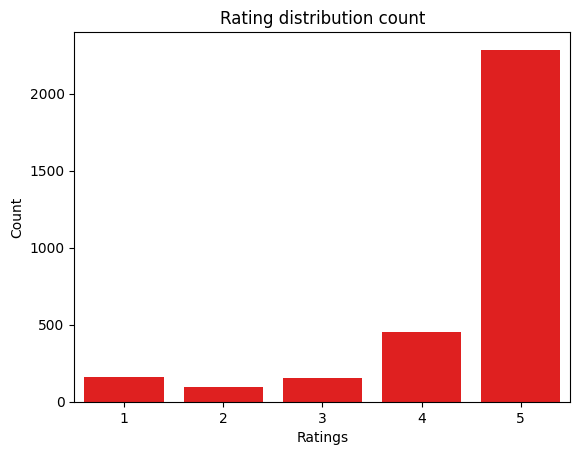

In [17]:
rating_counts = data['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [19]:
total_count = data.shape[0]
percentage_distribution = (rating_counts / total_count) * 100
rounded_percentage_distribution = percentage_distribution.round(2)
print(f"Rating value percentage distribution: \n{rounded_percentage_distribution}")

Rating value percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of rating'>

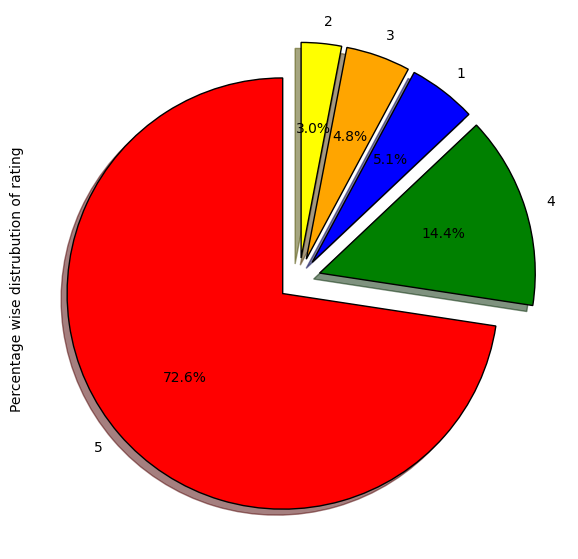

In [20]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

In [21]:
feedback_value = data['feedback'].value_counts()
print(f"Feedback Value Count : \n{feedback_value}")

Feedback Value Count : 
feedback
1    2893
0     256
Name: count, dtype: int64


In [22]:
#Extracting the 'verified_reviews' value for one record with feedback = 0 and feedback = 1
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)
review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Sound is terrible if u want good music too get a bose
Loved it!


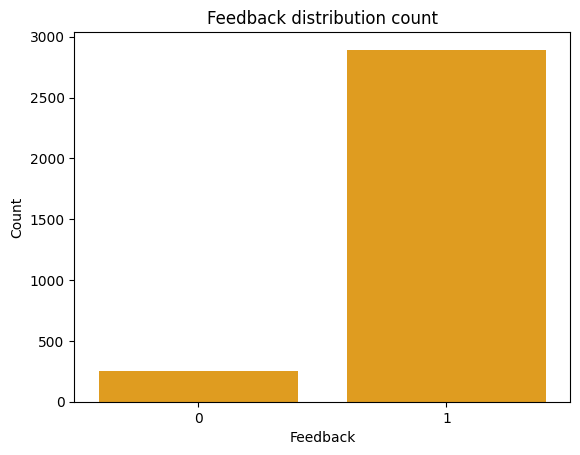

In [23]:
feedback_counts = data['feedback'].value_counts()
sns.barplot(x=feedback_counts.index, y=feedback_counts.values, color='orange')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [24]:
total_feedback = data.shape[0]

feedback_percentage = (feedback_counts / total_feedback) * 100
rounded_feedback_percentage = feedback_percentage.round(2)

print("Feedback value count - percentage distribution:")
print(rounded_feedback_percentage)

Feedback value count - percentage distribution:
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

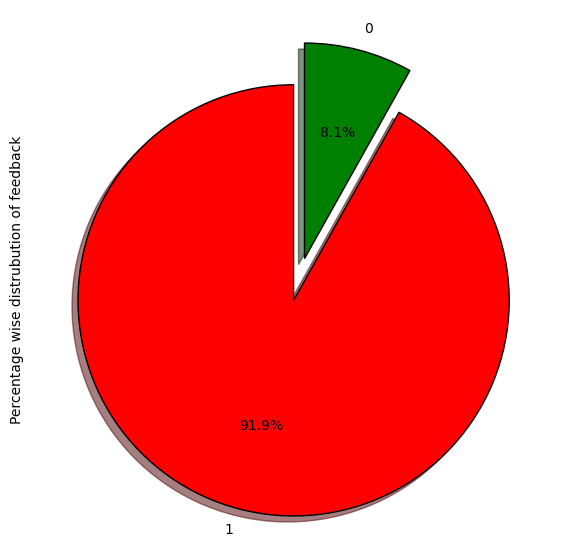

In [25]:
ig = plt.figure(figsize=(7,7))
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=('red','green'), startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [26]:
#rating values for 'feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [27]:
#rating values for 'feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

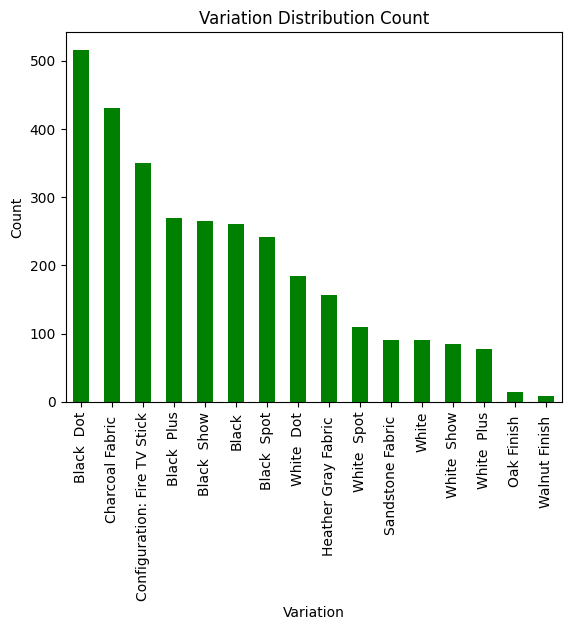

In [28]:
#Bar graph to visualize the total counts of each variation
variation = data['variation'].value_counts()
variation.plot(kind='bar', color='green')
plt.title('Variation Distribution Count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [31]:
#Finding the percentage distribution of each variation
total_variation = data.shape[0]
variation_percentage = (variation / total_variation) * 100
rounded_variation_percentage = variation_percentage.round(2)

print("Variation value count - percentage distribution:")
print(rounded_variation_percentage)

Variation value count - percentage distribution:
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [32]:
#Mean ratio according to variation
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

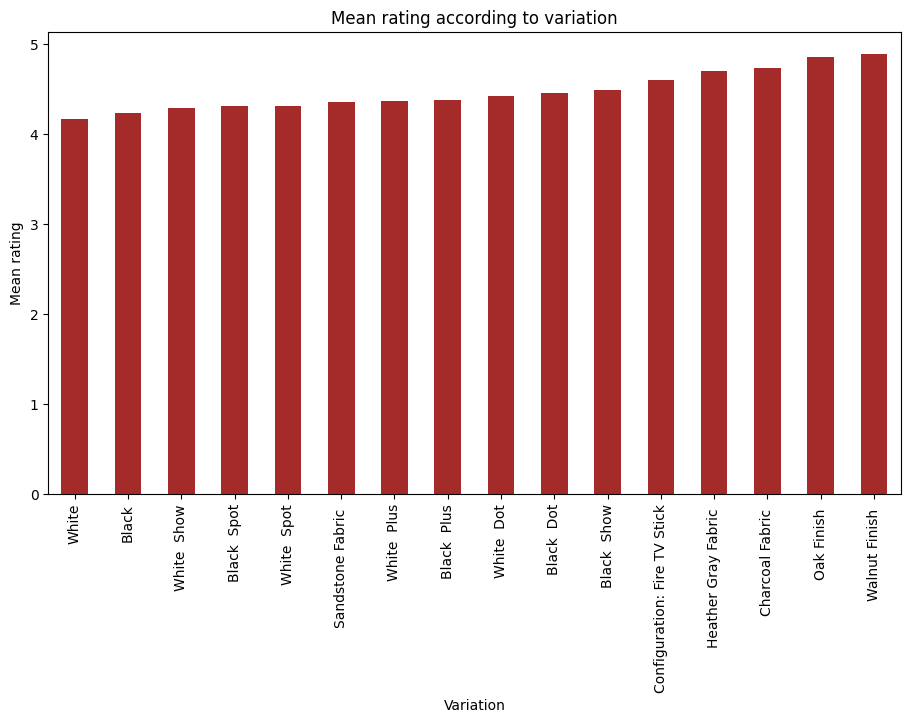

In [33]:
mean_variation = data.groupby('variation')['rating'].mean().sort_values()
mean_variation.plot(kind='bar',color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [34]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

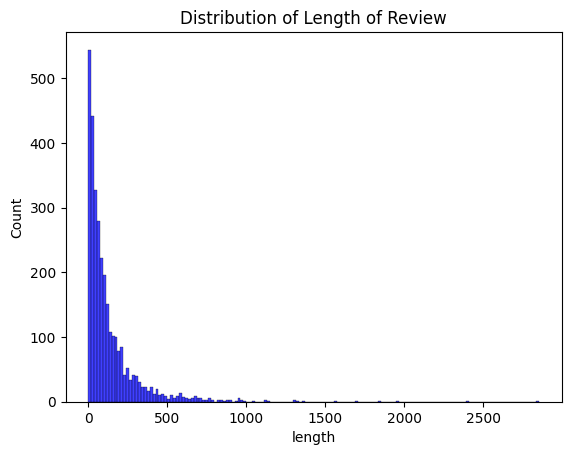

In [35]:
sns.histplot(data['length'], color='blue')
plt.title('Distribution of Length of Review')
plt.show()

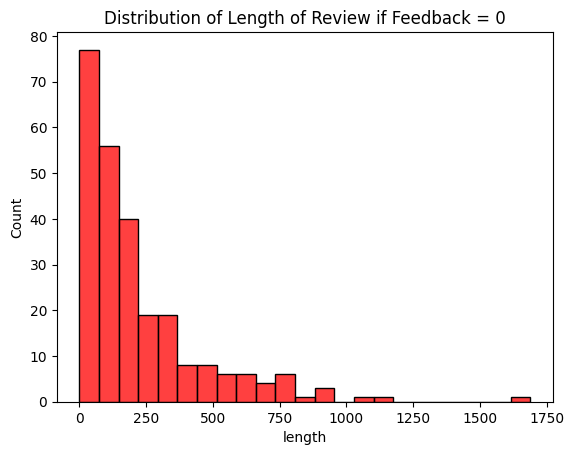

In [36]:
#Length analysis when feedback is 0 (negative)
feedback_0 = data[data['feedback'] == 0]['length']
sns.histplot(feedback_0, color='red')
plt.title('Distribution of Length of Review if Feedback = 0')
plt.show()

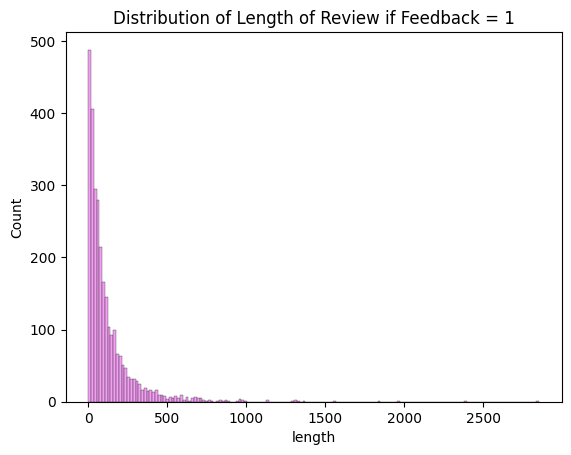

In [39]:
#Length analysis when feedback is 1 (positive)
feedback_1 = data[data['feedback'] == 1]['length']
sns.histplot(feedback_1, color='violet')
plt.title('Distribution of Length of Review if Feedback = 1')
plt.show()

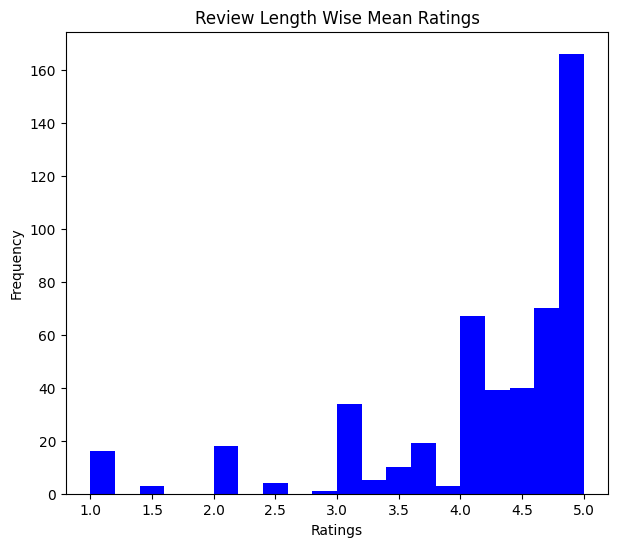

In [40]:
mean_ratings = data.groupby('length')['rating'].mean()
mean_ratings.plot(kind='hist', color='blue', figsize=(7, 6), bins=20)
plt.title('Review Length Wise Mean Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency') 
plt.show()

In [41]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

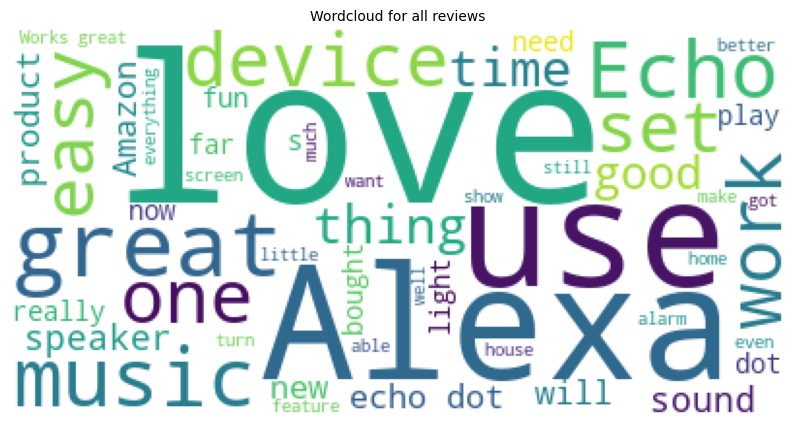

In [42]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [43]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

In [44]:
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

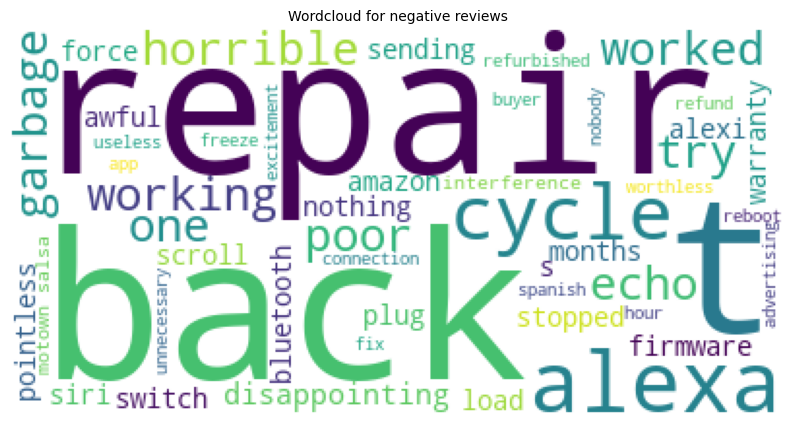

In [45]:
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

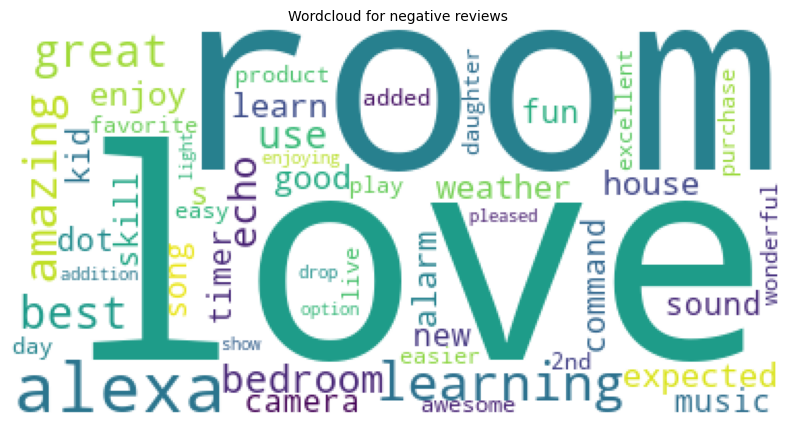

In [46]:
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

# Preprocessing and Modelling

In [47]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [48]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [49]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [50]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [51]:
#Splitting data into train and test set with 30% data with testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2204, 2500)
(2204,)
(945, 2500)
(945,)


In [53]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [54]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [56]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", rf.score(X_train_scl, y_train))
print("Testing Accuracy :", rf.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9417989417989417


In [57]:
y_preds = rf.predict(X_test_scl)

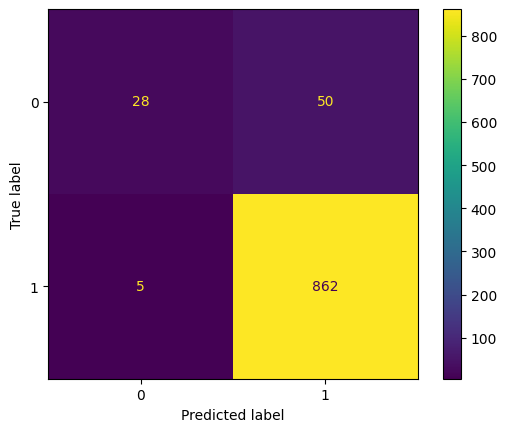

In [58]:
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
cm_display.plot()
plt.show()

In [60]:
accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [61]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [63]:
y_preds = model_xgb.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


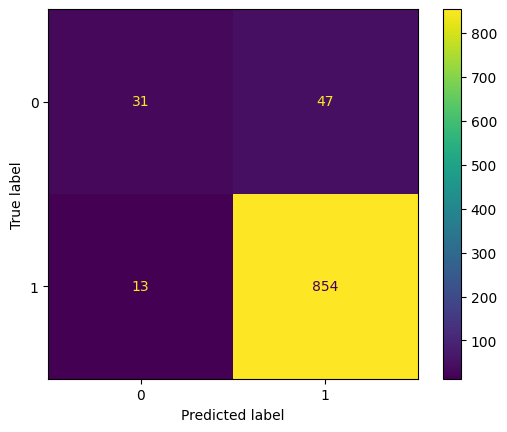

In [65]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [66]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [68]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [69]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", dt.score(X_train_scl, y_train))
print("Testing Accuracy :", dt.score(X_test_scl, y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9195767195767196


In [71]:
y_preds =dt.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 39  39]
 [ 89 778]]


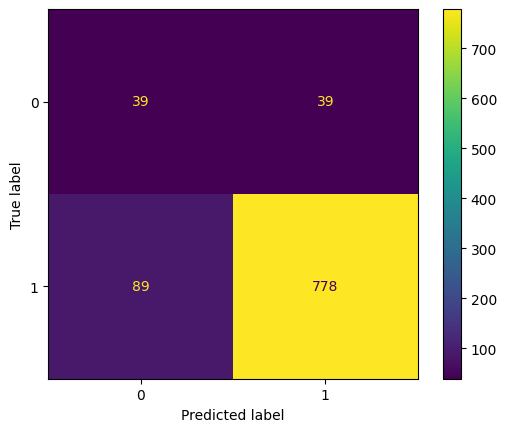

In [73]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()